In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
from dataset import Dataset

#I_scale = 10.0
I_scale = 2.0
dataset = Dataset(scale=I_scale)

In [20]:
print(len(dataset.patches))
print(np.std(dataset.patches))
print(np.mean(dataset.patches))

2375
4.2877784
-0.0033794187


In [21]:
#k1 = 0.5
#k2 = 1.0

#k1 = 0.0005 # rの学習率
#k2 = 0.0001 # Uの学習率

#k1 = 0.0005 # rの学習率
#k2 = 0.001 # Uの学習率

k1 = 0.0005 # rの学習率
k2 = 0.005 # Uの学習率

U_scale = 7.0

sigma_sq    = 1.0 # Iの生成観測分布の分散
sigma_sq_td = 10.0 # rの生成観測分布の分散
alpha1      = 1.0 # rの事前分布の精度パラメータ (分散の逆数)
alpha2      = 0.05 # r_tdの事前分布の精度パラメータ (分散=20.0, 標準偏差4.5)
lambd       = 0.02 # Uの事前分布の精度パラメータ　(分散=50.0, 標準偏差7.1)

iteration = 20

Us = (np.random.rand(3,256,32)-0.5) * U_scale
rs = np.zeros([3, 32], dtype=np.float32)

results = []
errors = []

patch_size = len(dataset.patches) # 2375

for k in range(patch_size):
    rs = np.zeros([3, 32], dtype=np.float32)
    
    for i in range(iteration):
        for j in range(3):
            I = dataset.get_image(k, j)
            r = rs[j]
            U = Us[j]
            Ur = U.dot(r)
            error = I - Ur
            dr = (k1 / sigma_sq) * U.T.dot(error) - 0.5 * k1 * 2.0 * alpha1 * r
            dU = (k2 / sigma_sq) * np.outer(error, r) - k2 * lambd * U
            rs[j] += dr
            Us[j] += dU
    
    if k % 100 == 0:
        print("us mean={} std={}".format(np.mean(Us[0]), np.std(Us[0])))                                    
        print("rs mean={} std={}".format(np.mean(rs), np.std(rs)))
    
    if k % 40 == 0:
        k2 = k2 / 1.015
    #    print("k2={}".format(k2))        
        

us mean=0.03447246376194208 std=2.009921533254852
rs mean=1.3394567919115067e-17 std=8.051411461377158e-17
us mean=0.028627258948498727 std=1.654289190908698
rs mean=7.689774065511301e-05 std=0.002344303298741579
us mean=0.024340348157196157 std=1.3710226458121684
rs mean=0.005016804672777653 std=0.019728180021047592
us mean=0.02117079627861864 std=1.14457404693458
rs mean=-0.0016593326581642032 std=0.02840159274637699
us mean=0.018615359106582845 std=0.9617316936029179
rs mean=2.4237384564538775e-17 std=1.6881522810477856e-16
us mean=0.01630737204125829 std=0.8138388874764801
rs mean=0.001419011503458023 std=0.013092339038848877
us mean=0.02658717451476133 std=0.746588482594457
rs mean=-0.023035014048218727 std=0.3060655891895294
us mean=0.050659848296632795 std=0.7901904913139561
rs mean=-0.022039592266082764 std=0.2308494746685028
us mean=0.052681568805601355 std=0.7998422375629483
rs mean=0.0023551832418888807 std=0.14599266648292542
us mean=0.043626342801232634 std=0.7884608098742

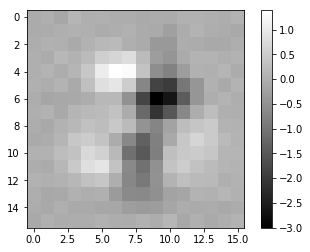

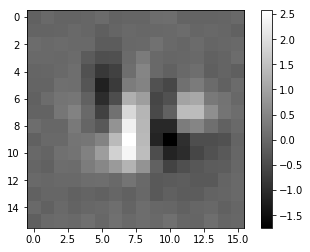

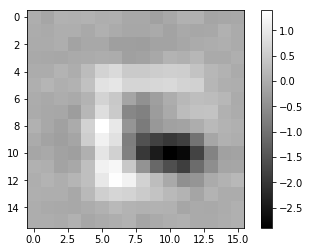

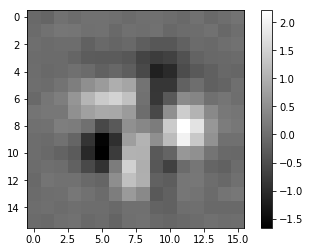

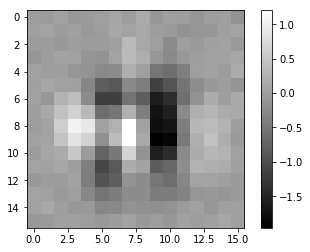

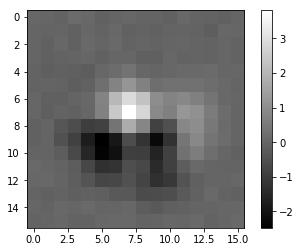

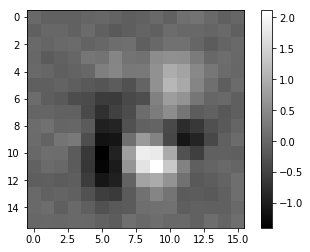

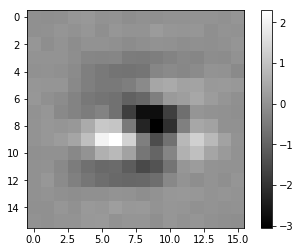

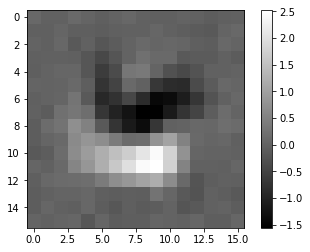

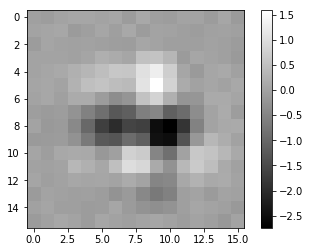

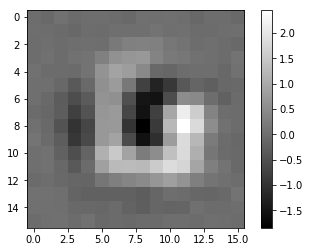

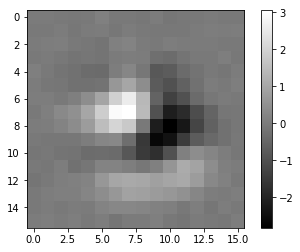

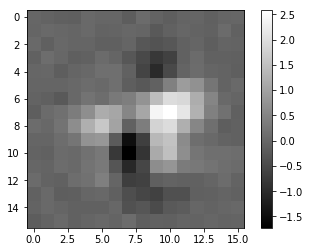

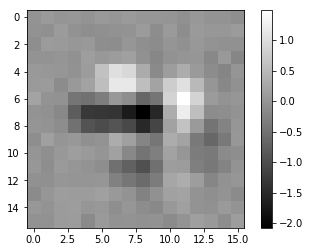

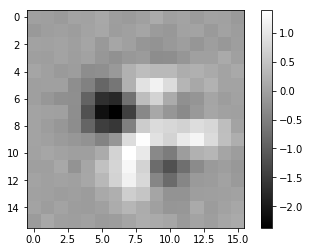

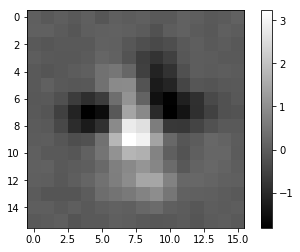

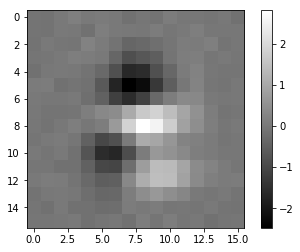

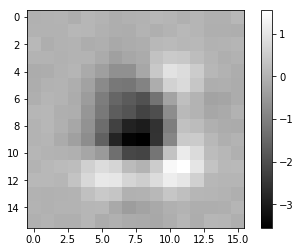

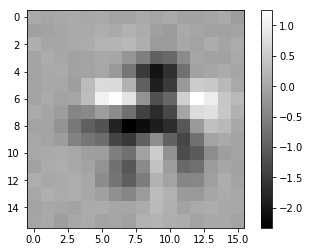

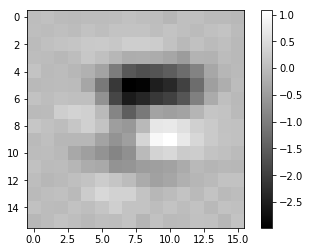

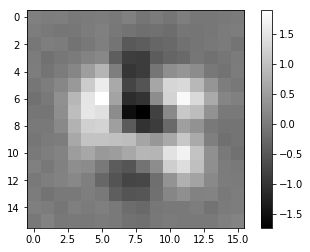

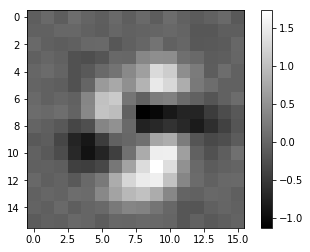

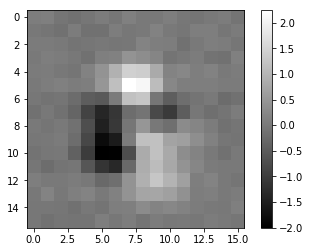

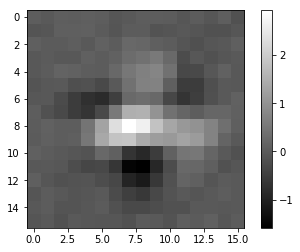

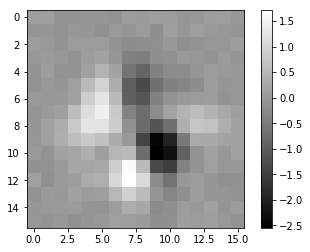

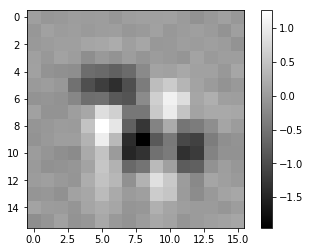

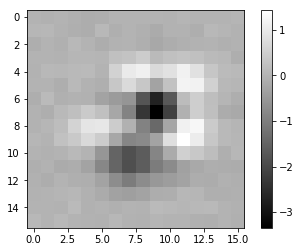

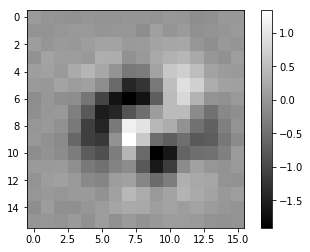

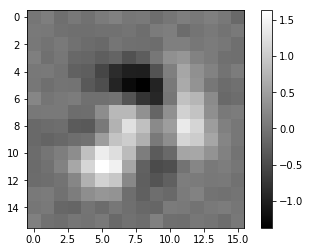

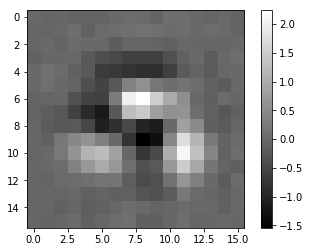

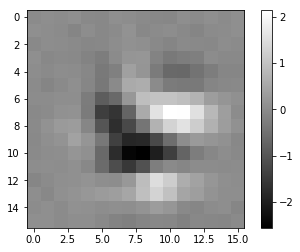

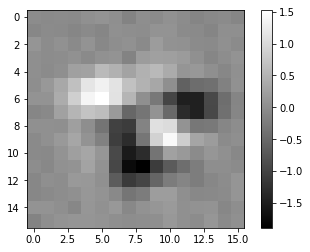

In [22]:
for i in range(32):
    u = Us[1][:,i].reshape(16,16)
    plt.figure()
    plt.imshow(u, cmap='gray')
    plt.colorbar()
    plt.show()

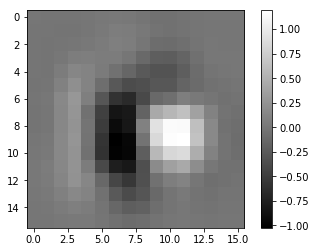

In [23]:
I = dataset.get_image(505, 0)

plt.figure()
plt.imshow(I.reshape(16,16), cmap='gray')
plt.colorbar()
plt.show()

## 再構成の確認

[-0.14577197 -0.09856113  0.08512144 -0.03635725  0.14572863  0.02564865
 -0.11524522  0.02104888  0.06992964 -0.05372069 -0.05330398 -0.14451966
 -0.09586164  0.00353885 -0.05980878  0.03314568  0.16216868  0.09882786
  0.14903317 -0.09000416 -0.00592395 -0.32139328 -0.01826516 -0.01978056
 -0.10406065 -0.09725571 -0.05268416 -0.01534387 -0.11786581  0.05417278
 -0.06624737  0.11760338]


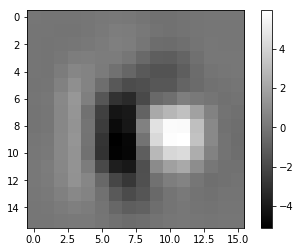

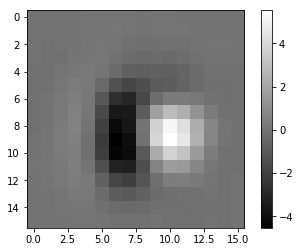

In [7]:
image_index = 505
I = dataset.get_image(image_index, 0)
rs = np.zeros([3, 32], dtype=np.float32)

for i in range(2):
    r = rs[j]
    U = Us[j]
    Ur = U.dot(r)
    error = I - Ur
    dr = (k1 / sigma_sq) * U.T.dot(error) - 0.5 * k1 * 2.0 * alpha1 * r
    rs[j] += dr

U = Us[j]
r = rs[j]

print(r)

I_rec = U.dot(r)

plt.figure()
plt.imshow(I.reshape(16,16), cmap='gray')
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(I_rec.reshape(16,16), cmap='gray')
plt.colorbar()
plt.show()